# Classification of Emission Line Galaxies with SDSS & WISE

## Imports

In [41]:
%matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

import pandas as pd
import numpy as np
from collections import Counter

import calc_kcor

Using matplotlib backend: MacOSX


In [2]:
galaxies = pd.read_csv('all_galaxies.csv', header=0)
galaxies

,specobjid,plate,mjd,fiberID,ra,dec,subclass,z,oiii_5007_flux,oiii_5007_flux_err,...,neiii_3869_flux,neiii_3869_flux_err,oii_3726_flux,oii_3726_flux_err,oii_3729_flux,oii_3729_flux_err,psfMag_g,psfMagErr_g,psfMag_z,psfMagErr_z
0,326554986014074880,290,51941,160,189.45584,-0.157681,NaN,0.138616,13.146890,2.987416,...,6.144023,2.900986,11.406200,4.101423,21.261510,4.295855,19.67988,0.018715,17.81138,0.024404
1,327724316412110848,291,51928,318,189.49717,-0.110552,STARFORMING,0.138305,8.675431,2.317272,...,5.864629,2.459746,14.731700,2.856537,6.085602,2.834561,20.10368,0.021257,18.92562,0.044774
2,331123732460365824,294,51986,397,196.19072,0.233178,STARBURST,0.091915,34.174830,2.439682,...,10.437470,2.830681,73.851870,4.054547,91.501850,4.279330,18.92324,0.014393,18.02275,0.029681
3,331134177820829696,294,51986,435,196.34009,0.288940,STARFORMING,0.083552,58.824350,2.322370,...,7.057436,2.571957,72.471210,3.937920,111.369500,4.211017,19.52605,0.017075,18.88479,0.051723
4,331153969030129664,294,51986,507,197.27106,0.348103,STARFORMING,0.096561,57.062790,3.197158,...,3.975352,3.267962,55.023870,4.815820,49.326940,4.780796,18.79014,0.020020,17.47571,0.023661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1101191172572866560,978,52431,222,258.58050,30.294842,NaN,0.112060,5.015080,2.392273,...,5.317585,2.756541,5.500735,4.256994,25.902370,4.267619,19.62692,0.015530,18.23180,0.024433
29996,1099008916567648256,976,52413,475,257.24686,32.348107,BROADLINE,0.120591,7.693543,2.303600,...,7.044323,2.566699,28.713150,3.630994,16.160110,3.603343,19.16641,0.018016,17.69808,0.021852
29997,1099005618032764928,976,52413,463,257.07730,32.559980,STARBURST,0.031085,157.734500,2.756798,...,19.227930,2.829844,101.924300,4.679415,114.529600,4.774861,19.70846,0.017782,19.29767,0.050942
29998,1102388540668405760,979,52427,482,259.88610,27.430696,NaN,0.114298,15.394610,5.161698,...,3.913468,2.546099,13.540770,3.264746,18.862020,3.359867,19.66572,0.018220,18.31620,0.027412


# Task 1

## Distribution of the data

In [3]:
Counter(galaxies['subclass'])

Counter({nan: 4710,
         'STARFORMING': 14953,
         'STARBURST': 7414,
         'AGN': 1908,
         'STARBURST BROADLINE': 203,
         'AGN BROADLINE': 271,
         'STARFORMING BROADLINE': 97,
         'BROADLINE': 444})

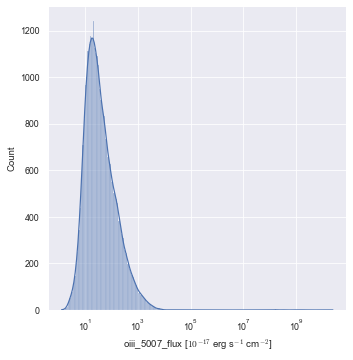

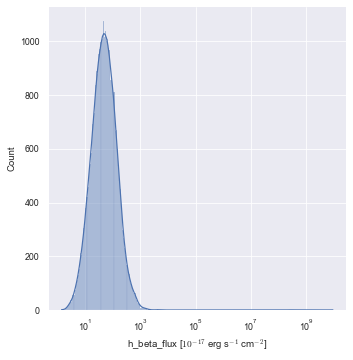

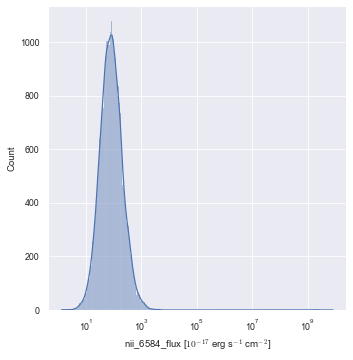

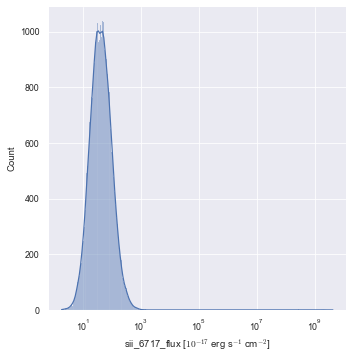

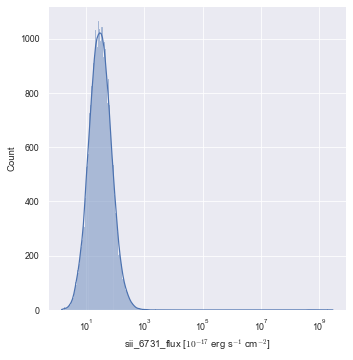

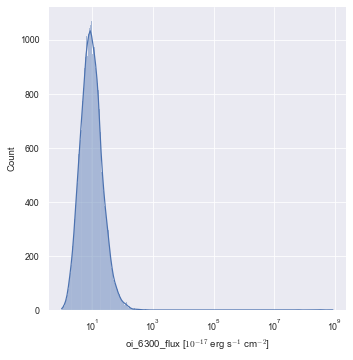

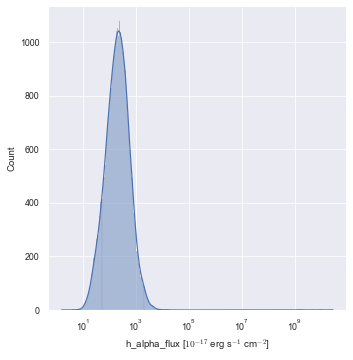

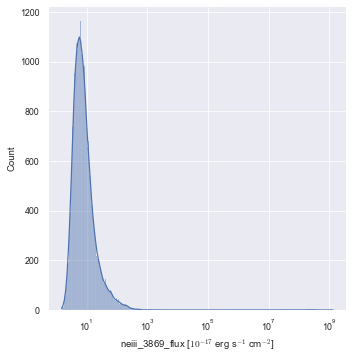

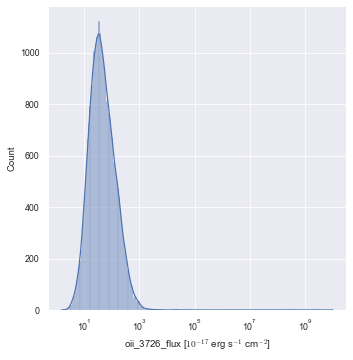

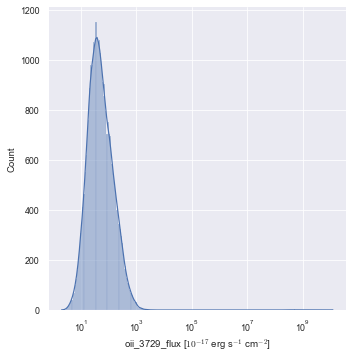

In [6]:
cols = ['oiii_5007_flux', 'h_beta_flux', 'nii_6584_flux', 'sii_6717_flux', 
        'sii_6731_flux','oi_6300_flux', 'h_alpha_flux', 'neiii_3869_flux', 
        'oii_3726_flux', 'oii_3729_flux']

for col in cols:
    sns.displot(data=galaxies, x=col, log_scale=True, kde=True)

    plt.xlabel(col + r' [$10^{-17}$ erg s$^{-1}$ cm$^{-2}$]')

    # plt.savefig('./data_histograms/distr_' + col + '.pdf')

    plt.show()

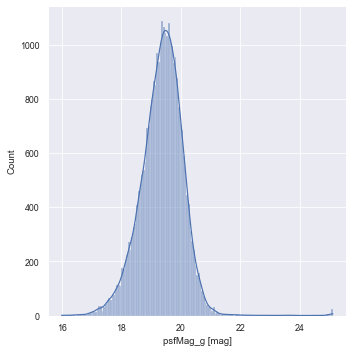

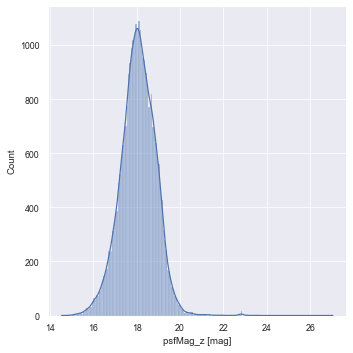

In [7]:
cols = ['psfMag_g', 'psfMag_z']

for col in cols:
    sns.displot(data=galaxies, x=col, log_scale=False, kde=True)

    plt.xlabel(col + r' [mag]')

    # plt.savefig('./data_histograms/distr_' + col + '.pdf')

    plt.show()

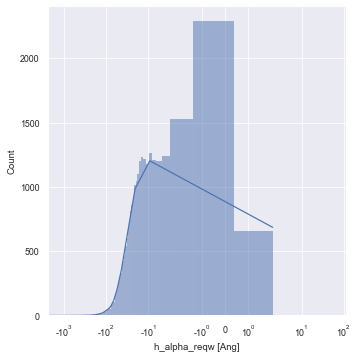

In [8]:
sns.displot(data=galaxies, x='h_alpha_reqw', log_scale=False, kde=True)

plt.xlabel(r'h_alpha_reqw [Ang]')

plt.xscale('symlog')

# plt.savefig('./data_histograms/distr_h_alpha_reqw.pdf')

plt.show()

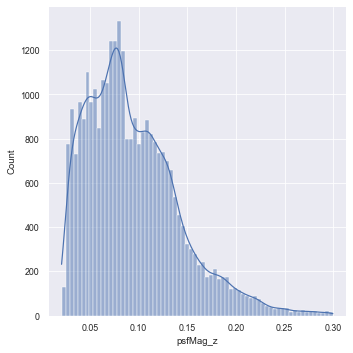

In [9]:
sns.displot(data=galaxies, x='z', log_scale=False, kde=True)

plt.xlabel(col)
# plt.savefig('distr_redshift.pdf')

plt.show()

## BPT Diagram

In [10]:
galaxies.columns

Index(['specobjid', 'plate', 'mjd', 'fiberID', 'ra', 'dec', 'subclass', 'z',
       'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err', 'nii_6584_flux',
       'nii_6584_flux_err', 'sii_6717_flux', 'sii_6717_flux_err',
       'sii_6731_flux', 'sii_6731_flux_err', 'oi_6300_flux',
       'oi_6300_flux_err', 'h_alpha_reqw', 'h_alpha_reqw_err',
       'neiii_3869_flux', 'neiii_3869_flux_err', 'oii_3726_flux',
       'oii_3726_flux_err', 'oii_3729_flux', 'oii_3729_flux_err', 'psfMag_g',
       'psfMagErr_g', 'psfMag_z', 'psfMagErr_z'],
      dtype='object')

In [4]:
# [NII] / H alpha
galaxies['nii_h_alpha'] = galaxies.apply(lambda x: x['nii_6584_flux'] / x['h_alpha_flux'], axis=1)
galaxies['nii_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['nii_h_alpha']), axis=1)

# [OIII] / H beta
galaxies['oiii_h_beta'] = galaxies.apply(lambda x: x['oiii_5007_flux'] / x['h_beta_flux'], axis=1)
galaxies['oiii_h_beta_log'] = galaxies.apply(lambda x: np.log10(x['oiii_h_beta']), axis=1)

# [SII] / H alpha
galaxies['sii6717_h_alpha'] = galaxies.apply(lambda x: x['sii_6717_flux'] / x['h_alpha_flux'], axis=1)
galaxies['sii6717_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['sii6717_h_alpha']), axis=1)

galaxies['sii6731_h_alpha'] = galaxies.apply(lambda x: x['sii_6731_flux'] / x['h_alpha_flux'], axis=1)
galaxies['sii6731_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['sii6731_h_alpha']), axis=1)

# [OIII] / [OI]
galaxies['oi_h_alpha'] = galaxies.apply(lambda x: x['oi_6300_flux'] / x['h_alpha_flux'], axis=1)
galaxies['oi_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['oi_h_alpha']), axis=1)

### BPT Diagram with SDSS Spectral Subclasses

In [5]:
galaxies[['nii_h_alpha_log', 'oiii_h_beta_log']].describe()

,nii_h_alpha_log,oiii_h_beta_log
count,30000.000000,30000.000000
mean,-0.403838,-0.109805
std,0.270922,0.395701
min,-2.025090,-1.866252
25%,-0.537497,-0.419028
50%,-0.422225,-0.145506
75%,-0.251653,0.158871
max,0.625955,1.804436


In [88]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=galaxies, x='nii_h_alpha', y='oiii_h_beta', palette='colorblind', 
                hue='subclass', style='subclass', size='subclass', sizes=(80, 20))

sns.kdeplot(data=galaxies, x='nii_h_alpha', y='oiii_h_beta', levels=7, alpha=0.5, 
            cut=2, color='k', log_scale=True)

plt.xlabel(r'[NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'[OIII] / H$\beta$', fontsize=13)

plt.xlim(0.005, 6.55)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('./BPT_Diagrams/BPT_diagram_sdss_subclasses.pdf')

plt.show()

### BPT Function

In [6]:
def plot_BPT(data, x, y, hue, xlabel, ylabel, 
             Kauffman=True, Kewley=True, 
             ylim=(-2.0, 2.0), 
             density=False, 
             save=False, save_name=None):
    
    plt.figure(figsize=(12, 8))

    plt.ylim(ylim)

    sns.scatterplot(data=data, x=x, y=y, palette='colorblind', 
                    hue=hue, style='BPT final', size=hue, sizes=(30, 15))
    if density:
        sns.kdeplot(data=galaxies, x=x, y=y, levels=7, alpha=0.5, cut=2, color='k')

    # ------------------------------------------------------------------------------------------------
    # Kauffman
    if Kauffman:
        x_to_plot = np.linspace(galaxies[x].min(), 0)
        plt.plot(x_to_plot, 0.61 / (x_to_plot - 0.05) + 1.3, label='Kauffman et al. 2003', 
                linewidth=1.5, alpha=0.8, c='k', linestyle='dashdot')

    # ------------------------------------------------------------------------------------------------
    # Kewley
    if Kewley:
        x_to_plot_1 = np.linspace(galaxies[x].min(), 0.4)
        plt.plot(x_to_plot_1, 0.61 / (x_to_plot_1 - 0.47) + 1.19, label='Kewley et al. 2001', 
                linewidth=1.5, alpha=0.8, c='k', linestyle='dashed')

    # ------------------------------------------------------------------------------------------------

    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)

    plt.legend(loc='lower left', fontsize=12)

    if save:
        plt.savefig('./BPT_Diagrams/' + save_name + '.pdf')

    plt.show()

### [NII]/H $\alpha$ vs. [OIII]/H $\beta$

#### Kauffman et al. 2003

In [7]:
def BPT_class_Kauff(oiii_h_beta, nii_h_alpha):
    # second condition is to avoid double lines
    if (np.log10(oiii_h_beta) < 0.61 / (np.log10(nii_h_alpha) - 0.05) + 1.3) and (np.log10(nii_h_alpha) < 0.0):
        return 'Star Forming'
    else:
        return 'AGN'

#### Kewley et al. 2001

In [8]:
def BPT_class_Kew(oiii_h_beta, nii_h_alpha):
    if np.log10(oiii_h_beta) < 0.61 / (np.log10(nii_h_alpha) - 0.47) + 1.19 and np.log10(nii_h_alpha) < 0.4:
        return 'Star Forming'
    else:
        return 'AGN'


In [9]:
galaxies['BPT Kauffman'] = galaxies.apply(lambda x: BPT_class_Kauff(x['oiii_h_beta'], x['nii_h_alpha']), axis=1)
galaxies['BPT Kewley'] = galaxies.apply(lambda x: BPT_class_Kew(x['oiii_h_beta'], x['nii_h_alpha']), axis=1)

In [10]:
def BPT_final_class(row):
    if row['BPT Kauffman'] != row['BPT Kewley']:
        return 'Composite'
    else:  # they are equal
        return row['BPT Kewley']

In [11]:
galaxies['BPT final'] = galaxies.apply(lambda x: BPT_final_class(x), axis=1)
Counter(galaxies['BPT final'])

Counter({'AGN': 5035, 'Star Forming': 19410, 'Composite': 5555})

In [90]:
plot_BPT(galaxies, 'nii_h_alpha_log', 'oiii_h_beta_log', 'BPT final', 
         r'log [NII] / H$\alpha$', r'log [OIII] / H$\beta$', 
         Kauffman=True, Kewley=True, density=True)#, save=True, save_name='BPT_niiHa_oiiiHb')

### [SII]/H $\alpha$ vs. [OIII]/H $\beta$

In [91]:
plot_BPT(galaxies, 'sii6717_h_alpha_log', 'oiii_h_beta_log', 'BPT final', 
         r'log [SII] 6717 / H$\alpha$', r'log [OIII] / H$\beta$', 
         Kauffman=True, Kewley=True, density=True)#, save=True, save_name='BPT_sii6717Ha_oiiiHb')

In [92]:
plot_BPT(galaxies, 'sii6731_h_alpha_log', 'oiii_h_beta_log', 'BPT final', 
         r'log [SII] 6731 / H$\alpha$', r'log [OIII] / H$\beta$', 
         Kauffman=True, Kewley=True, density=True)#, save=True, save_name='BPT_sii6731Ha_oiiiHb')

In [12]:
galaxies['sii_h_alpha'] = galaxies.apply(lambda x: (x['sii6717_h_alpha'] + x['sii6731_h_alpha']) / 2, axis=1)
galaxies['sii_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['sii_h_alpha']), axis=1)

In [94]:
galaxies[['sii6717_h_alpha', 'sii6731_h_alpha', 'sii_h_alpha']].describe()

,sii6717_h_alpha,sii6731_h_alpha,sii_h_alpha
count,30000.000000,30000.000000,30000.000000
mean,0.236260,0.174624,0.205442
std,0.151128,0.240988,0.160457
min,0.000017,0.000012,0.000015
25%,0.161981,0.117389,0.140765
50%,0.197402,0.140893,0.169683
75%,0.254186,0.183066,0.218774
max,12.596268,34.512769,17.367874


In [95]:
plot_BPT(galaxies, 'sii_h_alpha_log', 'oiii_h_beta_log', 'BPT final', 
         r'log [SII] 6717, 6731 / H$\alpha$', r'log [OIII] / H$\beta$', 
         Kauffman=True, Kewley=True, density=True)#, save=True, save_name='BPT_sii67176731Ha_oiiiHb')

### [OIII]/H $\beta$ vs [OI]/H $\alpha$

In [96]:
plot_BPT(galaxies, 'oi_h_alpha_log', 'oiii_h_beta_log', 'BPT final', 
         r'log [OI] / H$\alpha$', r'log [OIII] / H$\beta$', 
         Kauffman=True, Kewley=True, density=True)#, save=True, save_name='BPT_oiHa_oiiiHb')

## WHAN Diagram

In [14]:
galaxies['h_alpha_reqw_log'] = galaxies.apply(lambda x: np.log10(x['h_alpha_reqw']), axis=1)
galaxies['h_alpha_reqw_abs'] = galaxies.apply(lambda x: np.abs(x['h_alpha_reqw']), axis=1)

galaxies['nii_6584_reqw_log'] = galaxies.apply(lambda x: np.log10(x['nii_6584_reqw']), axis=1)
galaxies['nii_6584_reqw_abs'] = galaxies.apply(lambda x: np.abs(x['nii_6584_reqw']), axis=1)

/Users/nicolasgalvarinoguerravaras/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/Users/nicolasgalvarinoguerravaras/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [15]:
galaxies[['h_alpha_reqw', 'h_alpha_reqw_abs', 'h_alpha_reqw_log']].describe()

,h_alpha_reqw,h_alpha_reqw_abs,h_alpha_reqw_log
count,30000.000000,30000.000000,1045.000000
mean,-30.474006,30.505340,-0.502930
std,48.174737,48.154902,0.450692
min,-1986.580000,0.000136,-3.694147
25%,-38.240073,9.195223,-0.692584
50%,-21.499840,21.499840,-0.406230
75%,-9.195223,38.240073,-0.191100
max,2.084865,1986.580000,0.319078


In [21]:
galaxies[galaxies['h_alpha_reqw'] > 0].describe()

,specobjid,plate,mjd,fiberID,ra,dec,z,oiii_5007_flux,oiii_5007_flux_err,h_alpha_flux,...,sii6731_h_alpha,sii6731_h_alpha_log,oi_h_alpha,oi_h_alpha_log,sii_h_alpha,sii_h_alpha_log,h_alpha_reqw_log,h_alpha_reqw_abs,nii_6584_reqw_log,nii_6584_reqw_abs
count,1.045000e+03,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,...,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1.000000,1045.000000
mean,5.590824e+17,496.483254,52034.628708,334.523445,166.958153,19.823010,0.080622,21.843837,3.448558,37.918674,...,0.347009,-0.504068,0.218162,-0.713381,0.423804,-0.401692,-0.502930,0.449763,-1.871863,1.355300
std,1.840483e+17,163.466170,275.193676,182.409797,75.212961,26.058351,0.034426,15.737773,1.295537,45.592059,...,0.165165,0.202690,0.120937,0.210371,0.160293,0.163942,0.450692,0.316475,NaN,0.575454
min,2.995644e+17,266.000000,51602.000000,2.000000,0.318710,-11.060015,0.023996,2.537258,1.255746,3.802541,...,0.005154,-2.287842,0.008380,-2.076735,0.007343,-2.134135,-3.694147,0.000202,-1.871863,0.013432
25%,3.997704e+17,355.000000,51885.000000,180.000000,134.246060,0.226860,0.053978,10.907100,2.590546,20.112970,...,0.241291,-0.617459,0.140451,-0.852475,0.317787,-0.497864,-0.692584,0.202963,-1.871863,0.995097
50%,5.528842e+17,491.000000,51992.000000,344.000000,172.391140,3.083719,0.077414,17.202580,3.186370,29.554330,...,0.318718,-0.496593,0.190775,-0.719478,0.400719,-0.397160,-0.406230,0.392437,-1.871863,1.270384
75%,6.598953e+17,586.000000,52234.000000,497.000000,215.722990,48.348354,0.103077,27.991280,4.004079,45.078800,...,0.419680,-0.377082,0.263929,-0.578512,0.496223,-0.304323,-0.191100,0.644020,-1.871863,1.650767
max,1.186835e+18,1054.000000,54530.000000,640.000000,359.968180,68.386090,0.275342,143.438400,11.069600,1262.027000,...,1.967627,0.293943,1.348939,0.129992,1.564043,0.194249,0.319078,2.084865,-1.871863,5.534912


In [30]:
galaxies[['h_alpha_reqw_abs', 'nii_6584_reqw_abs']].describe()

,h_alpha_reqw_abs,nii_6584_reqw_abs
count,30000.000000,30000.000000
mean,30.505340,10.185328
std,48.154902,8.074209
min,0.000136,0.013432
25%,9.195223,4.763378
50%,21.499840,8.215543
75%,38.240073,13.268442
max,1986.580000,140.038800


In [34]:
def whan_label(nii_h_alpha_log, nii_6584_reqw, h_alpha_reqw):
    if (h_alpha_reqw < 0.5) and (nii_6584_reqw < 0.5):
        return 'Passive'
    elif (nii_h_alpha_log < -0.4) and (h_alpha_reqw > 3):
        return 'Star Forming'
    elif (nii_h_alpha_log > -0.4) and (h_alpha_reqw > 6):
        return 'Seyfert'
    elif (nii_h_alpha_log > -0.4) and (h_alpha_reqw > 3) and (h_alpha_reqw < 6):
        return 'Weak AGN'
    elif (h_alpha_reqw < 3):
        return 'RG'

In [35]:
galaxies['WHAN label'] = galaxies.apply(lambda x: whan_label(x['nii_h_alpha_log'], x['nii_6584_reqw_abs'], 
                                                             x['h_alpha_reqw_abs']), axis=1)

In [36]:
Counter(galaxies['WHAN label'])

Counter({'RG': 3756,
         'Star Forming': 16321,
         'Seyfert': 8333,
         'Weak AGN': 1581,
         'Passive': 9})

In [45]:
gals_eqw = galaxies.loc[((galaxies['h_alpha_reqw'] <= 0) & (galaxies['nii_6584_reqw'] <= 0))]

In [46]:
Counter(gals_eqw['WHAN label'])

Counter({'RG': 2718,
         'Star Forming': 16308,
         'Seyfert': 8332,
         'Weak AGN': 1580,
         'Passive': 1})

In [52]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=galaxies, x='nii_h_alpha', y='h_alpha_reqw_abs', palette='colorblind', 
                hue='WHAN label', style='WHAN label', size='WHAN label', sizes=(30, 15))

sns.kdeplot(data=galaxies, x='nii_h_alpha', y='h_alpha_reqw_abs', levels=7, 
            alpha=0.5, cut=2, color='k', log_scale=True)

plt.ylim(10**(-4.2), 10**(3.8))
plt.xlim(10**(-2.5), 10)

plt.vlines(10**(-0.4), 10**(-4.2), 10**(3.8), linewidth=1.0, alpha=0.8, colors='k', linestyle='solid', 
           label=r'[NII] / H$\alpha = 0.4$')
plt.hlines(6, 10**(-0.4), 10, linewidth=1.5, alpha=0.8, colors='k', linestyle='dashdot', 
           label=r'$W_{H_{\alpha}} = 6$ [Ang], Kewley+2006')
plt.hlines(3, 10**(-0.4), 10, linewidth=1.5, alpha=0.8, colors='k', linestyle='dashed', 
           label=r'$W_{H_{\alpha}} = 3$ [Ang]')
plt.hlines(0.5, 10**(-2.5), 10, linewidth=1.0, alpha=0.8, colors='k', linestyle='solid', 
           label=r'$W_{H_{\alpha}} = 0.5$ [Ang]')

plt.xlabel(r'log [NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'log $W_{H_{\alpha}}$ [Ang]', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('WHAN_diagram_whan_label.pdf')

plt.show()

In [53]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=galaxies, x='nii_h_alpha', y='h_alpha_reqw_abs', palette='colorblind', 
                hue='BPT final', style='BPT final', size='BPT final', sizes=(30, 15))

sns.kdeplot(data=galaxies, x='nii_h_alpha', y='h_alpha_reqw_abs', levels=7, 
            alpha=0.5, cut=2, color='k', log_scale=True)

plt.ylim(10**(-4.2), 10**(3.8))
plt.xlim(10**(-2.5), 10)

plt.vlines(10**(-0.4), 10**(-4.2), 10**(3.8), linewidth=1.0, alpha=0.8, colors='k', linestyle='solid', 
           label=r'[NII] / H$\alpha = 0.4$')
plt.hlines(6, 10**(-0.4), 10, linewidth=1.5, alpha=0.8, colors='k', linestyle='dashdot', 
           label=r'$W_{H_{\alpha}} = 6$ [Ang], Kewley+2006')
plt.hlines(3, 10**(-0.4), 10, linewidth=1.5, alpha=0.8, colors='k', linestyle='dashed', 
           label=r'$W_{H_{\alpha}} = 3$ [Ang]')
plt.hlines(0.5, 10**(-2.5), 10, linewidth=1.0, alpha=0.8, colors='k', linestyle='solid', 
           label=r'$W_{H_{\alpha}} = 0.5$ [Ang]')

plt.xlabel(r'log [NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'log $W_{H_{\alpha}}$ [Ang]', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('WHAN_diagram.pdf')

plt.show()

# Task 2

In [28]:
# [NeIII] / [OII]
galaxies['neiii_oii'] = galaxies.apply(lambda x: x['neiii_3869_flux'] / ((x['oii_3726_flux'] + x['oii_3729_flux']) / 2), axis=1)
galaxies['neiii_oii_log'] = galaxies.apply(lambda x: np.log10(x['neiii_oii']), axis=1)

## Redshift k-Correction

In [29]:
galaxies['g_z_color'] = galaxies['psfMag_g'] - galaxies['psfMag_z']

In [30]:
galaxies['g_z_color_zkcorr'] = galaxies.apply(lambda x: calc_kcor.calc_kcor('z', x['z'], 'g - z', x['g_z_color']), axis=1)
galaxies['g_z_color_gkcorr'] = galaxies.apply(lambda x: calc_kcor.calc_kcor('g', x['z'], 'g - z', x['g_z_color']), axis=1)

In [105]:
galaxies[['g_z_color', 'g_z_color_gkcorr', 'g_z_color_zkcorr']].describe()

,g_z_color,g_z_color_gkcorr,g_z_color_zkcorr
count,30000.000000,30000.000000,30000.000000
mean,1.295787,0.136611,0.000016
std,0.502889,1.836931,0.331340
min,-7.216440,-67.313476,-12.851880
25%,0.961345,0.050655,-0.007045
50%,1.356135,0.119674,0.007894
75%,1.644308,0.214731,0.019327
max,7.506230,249.856235,43.987654


## Defining Sub-Sample

In [32]:
galaxies.columns

Index(['specobjid', 'plate', 'mjd', 'fiberID', 'ra', 'dec', 'subclass', 'z',
       'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err', 'nii_6584_flux',
       'nii_6584_flux_err', 'sii_6717_flux', 'sii_6717_flux_err',
       'sii_6731_flux', 'sii_6731_flux_err', 'oi_6300_flux',
       'oi_6300_flux_err', 'h_alpha_reqw', 'h_alpha_reqw_err',
       'neiii_3869_flux', 'neiii_3869_flux_err', 'oii_3726_flux',
       'oii_3726_flux_err', 'oii_3729_flux', 'oii_3729_flux_err', 'psfMag_g',
       'psfMagErr_g', 'psfMag_z', 'psfMagErr_z', 'nii_h_alpha',
       'nii_h_alpha_log', 'oiii_h_beta', 'oiii_h_beta_log', 'sii6717_h_alpha',
       'sii6717_h_alpha_log', 'sii6731_h_alpha', 'sii6731_h_alpha_log',
       'oi_h_alpha', 'oi_h_alpha_log', 'BPT Kauffman', 'BPT Kewley',
       'BPT final', 'sii_h_alpha', 'sii_h_alpha_log', 'h_alpha_reqw_log',
       'h_alpha_reqw_abs', 'neiii_oii', 'neiii_oii_log', 'g_z_color',
       'g_z_color_zk

In [33]:
# Signal to noise ratio of neiii_3869_flux, oii_3729_flux and oii_3726_flux >= 5
# [O iii], 
# Hβ,
# [Nii], 
# Hα, 
# and[Oii] with S/N > 5, but [Ne iii]has S/N < 5

sub_gals = galaxies.loc[(galaxies['oii_3729_flux'] / galaxies['oii_3729_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['oii_3726_flux'] / sub_gals['oii_3726_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['oiii_5007_flux'] / sub_gals['oiii_5007_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['h_alpha_flux'] / sub_gals['h_alpha_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['h_beta_flux'] / sub_gals['h_beta_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['nii_6584_flux'] / sub_gals['nii_6584_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['neiii_3869_flux'] / sub_gals['neiii_3869_flux_err']) <= 5]
sub_gals

,specobjid,plate,mjd,fiberID,ra,dec,subclass,z,oiii_5007_flux,oiii_5007_flux_err,...,BPT final,sii_h_alpha,sii_h_alpha_log,h_alpha_reqw_log,h_alpha_reqw_abs,neiii_oii,neiii_oii_log,g_z_color,g_z_color_zkcorr,g_z_color_gkcorr
0,305174431683078144,271,51883,202,154.090130,-0.971407,STARBURST,0.063123,92.12244,2.618963,...,Star Forming,0.170181,-0.769089,NaN,47.24213,0.038690,-1.412404,0.63992,-0.015457,0.014659
1,305144744869128192,271,51883,94,154.637040,-0.909173,STARBURST,0.049476,76.97161,2.971411,...,Star Forming,0.126963,-0.896324,NaN,59.72261,0.066732,-1.175666,0.95311,0.001637,0.056677
2,305131275851687936,271,51883,45,154.786140,-1.029548,STARBURST,0.094921,56.61370,3.481388,...,Composite,0.145434,-0.837333,NaN,38.23195,0.113011,-0.946878,1.34757,0.005482,0.155068
3,306322322795554816,272,51941,282,154.955690,-1.022654,STARBURST,0.043465,60.38306,3.433703,...,Star Forming,0.115240,-0.938395,NaN,68.71297,0.076632,-1.115593,0.98121,0.004245,0.057867
4,305135124142385152,271,51883,59,154.961470,-1.050257,STARFORMING,0.060961,51.07178,2.564878,...,Star Forming,0.162920,-0.788026,NaN,33.10934,0.069462,-1.158253,0.88379,-0.005656,0.046400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29989,738689605850654720,656,52148,361,10.891932,-8.843627,STARFORMING,0.049873,140.80780,3.114323,...,Star Forming,0.162117,-0.790172,NaN,37.71205,0.081534,-1.088662,0.75038,-0.004859,0.033207
29991,738748154844833792,656,52148,574,12.363142,-8.714825,STARFORMING,0.086486,26.60374,2.297716,...,Star Forming,0.134484,-0.871329,NaN,22.52885,0.079881,-1.097555,1.32329,0.006440,0.141813
29997,471812015690639360,419,51868,218,10.900041,13.913361,STARFORMING,0.130237,13.93644,2.285449,...,Star Forming,0.111674,-0.952047,NaN,26.13622,0.191566,-0.717681,1.39337,-0.001937,0.197010
29998,471809541974026240,419,51879,209,10.900041,13.913361,STARFORMING,0.130228,11.90064,2.168367,...,Star Forming,0.125339,-0.901913,NaN,26.71813,0.278091,-0.555813,1.39337,-0.001934,0.197005


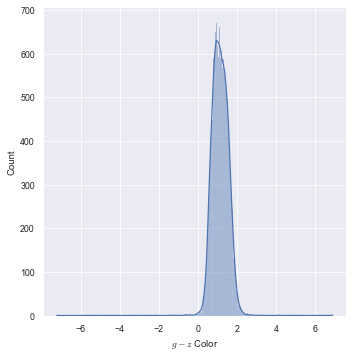

In [34]:
sns.displot(data=sub_gals, x='g_z_color', log_scale=False, kde=True)

plt.xlabel(r'$g-z$ Color')

 #plt.savefig('./data_histograms/distr_g_z_color.pdf')

plt.show()

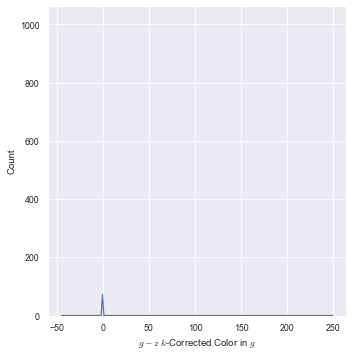

In [35]:
sns.displot(data=sub_gals, x='g_z_color_gkcorr', log_scale=False, kde=True)

plt.xlabel(r'$g-z$ $k$-Corrected Color in $g$')

# plt.savefig('./data_histograms/distr_g_z_color_gkcorr.pdf')

plt.show()

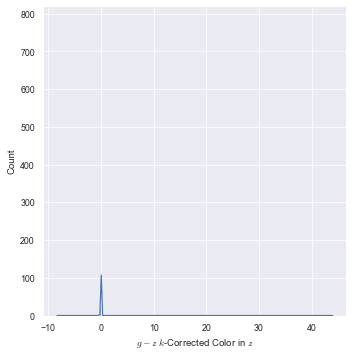

In [36]:
sns.displot(data=sub_gals, x='g_z_color_zkcorr', log_scale=False, kde=True)

plt.xlabel(r'$g-z$ $k$-Corrected Color in $z$')

# plt.savefig('./data_histograms/distr_g_z_color_zkcorr.pdf')

plt.show()

## BPT Diagram

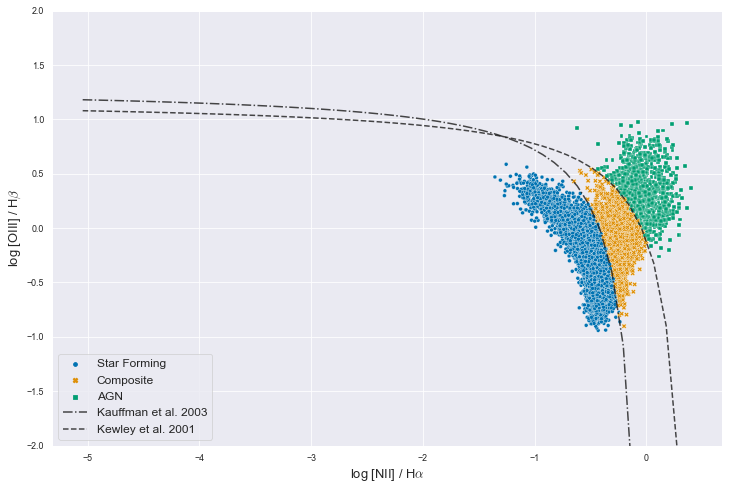

In [37]:
plot_BPT(sub_gals, 'nii_h_alpha_log', 'oiii_h_beta_log', 'BPT final', 
         r'log [NII] / H$\alpha$', r'log [OIII] / H$\beta$', 
         Kauffman=True, Kewley=True)#, save=True, save_name='BPT_sub_niiHa_oiiiHb')

## TBT Diagram

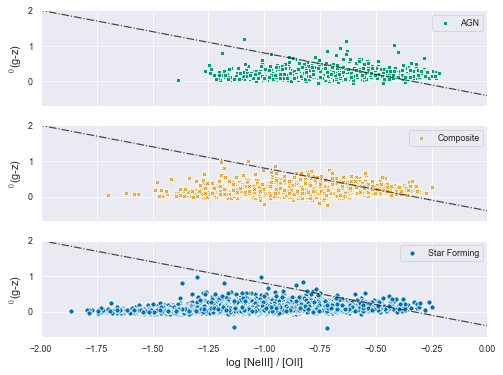

In [38]:
# plt.figure(figsize=(12, 8))

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, sharex=True,
                                    figsize=(8, 6))

ax0.scatter(sub_gals[sub_gals['BPT final']=='AGN']['neiii_oii_log'], 
            sub_gals[sub_gals['BPT final']=='AGN']['g_z_color_gkcorr'], 
            marker='s', s=22, c='#029e73', edgecolor='white', 
            label='AGN')

ax1.scatter(sub_gals[sub_gals['BPT final']=='Composite']['neiii_oii_log'], 
            sub_gals[sub_gals['BPT final']=='Composite']['g_z_color_gkcorr'], 
            marker='X', s=27, c='#de8f05', edgecolor='white', 
            label='Composite')

ax2.scatter(sub_gals[sub_gals['BPT final']=='Star Forming']['neiii_oii_log'], 
            sub_gals[sub_gals['BPT final']=='Star Forming']['g_z_color_gkcorr'], 
            marker='o', s=27, c='#0173b2', edgecolor='white', 
            label='Star Forming')

x_to_plot = np.linspace(10**(-2.7), 10**(0.5), 50)
ax0.plot(np.log10(x_to_plot), - 1.2 * np.log10(x_to_plot) - 0.4, 
         linewidth=1.2, alpha=0.8, c='k', linestyle='dashdot')
ax1.plot(np.log10(x_to_plot), - 1.2 * np.log10(x_to_plot) - 0.4, 
         linewidth=1.2, alpha=0.8, c='k', linestyle='dashdot')
ax2.plot(np.log10(x_to_plot), - 1.2 * np.log10(x_to_plot) - 0.4, 
         linewidth=1.2, alpha=0.8, c='k', linestyle='dashdot')

plt.xlabel(r'log [NeIII] / [OII]', fontsize=11)

for ax in [ax0, ax1, ax2]:
    ax.set_ylabel(r'$^0$(g-z)', fontsize=11)
    ax.set_xlim(-2, 0)
    ax.set_ylim(-0.7, 2.0)
    ax.legend()

# plt.legend(loc='upper right', fontsize=10)
# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# fig.legend(lines, labels, bbox_to_anchor=(0.6, 1.02), fontsize=10)

# plt.savefig('TBT_sub_diagrams.pdf')

plt.show()

# Task 3: WISE

In [2]:
wise_sub = pd.read_csv('wise_subsample.csv')
wise_sub.columns

Index(['specobjid_1', 'plate_1', 'mjd_1', 'fiberID_1', 'ra_1', 'dec_1',
       'subclass_1', 'z_1', 'oiii_5007_flux', 'oiii_5007_flux_err',
       'h_alpha_flux', 'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err',
       'nii_6584_flux', 'nii_6584_flux_err', 'sii_6717_flux',
       'sii_6717_flux_err', 'sii_6731_flux', 'sii_6731_flux_err',
       'oi_6300_flux', 'oi_6300_flux_err', 'h_alpha_reqw', 'h_alpha_reqw_err',
       'neiii_3869_flux', 'neiii_3869_flux_err', 'oii_3726_flux',
       'oii_3726_flux_err', 'oii_3729_flux', 'oii_3729_flux_err', 'psfMag_g',
       'psfMagErr_g', 'psfMag_z', 'psfMagErr_z', 'specobjid_2', 'plate_2',
       'mjd_2', 'fiberID_2', 'ra_2', 'dec_2', 'subclass_2', 'z_2', 'w1', 'w2',
       'w3', 'w1sigmpro', 'w2sigmpro', 'w3sigmpro', 'w1flux', 'w2flux',
       'w3flux', 'w1sigflux', 'w2sigflux', 'w3sigflux', 'GroupID', 'GroupSize',
       'Separation'],
      dtype='object')

In [3]:
wise_sub.shape

(28212, 57)

## Distribution of Data

In [4]:
cols = ['w1', 'w2', 'w3']

for col in cols:
    sns.displot(data=wise_sub, x=col, log_scale=False, kde=True)

    plt.xlabel(col + r' [mag]')

    #plt.savefig('./wise_data_histograms/distr_' + col + '.pdf')

    plt.show()

In [5]:
cols = ['w1flux', 'w2flux', 'w3flux']

for col in cols:
    sns.displot(data=wise_sub, x=col, log_scale=True, kde=True)

    plt.xlabel(col)

    # plt.savefig('./wise_data_histograms/distr_' + col + '.pdf')

    plt.show()

## WISE Labels

In [6]:
def wise_color_color(w1, w2, w3):
    '''
    Returns the class according to Figure 11b in Jarret et al. 2017
    '''
    color_x = w2 - w3
    color_y = w1 - w2

    if color_y >= 0.8:
        return 'AGN & (u)LIRGs'
    elif color_y < 0.8 and color_x < 2.0:
        return 'Spheroids'
    elif color_y < 0.8 and color_x > 3.5:
        return 'SF Disks'
    else:
        return 'Inter. Disks'

In [7]:
wise_sub['wise class'] = wise_sub.apply(lambda x: wise_color_color(x['w1'], x['w2'], x['w3']), axis=1)
Counter(wise_sub['wise class'])

Counter({'SF Disks': 13212,
         'Inter. Disks': 12119,
         'Spheroids': 2297,
         'AGN & (u)LIRGs': 584})

In [8]:
wise_sub['w1-w2'] = wise_sub.apply(lambda x: x['w1'] - x['w2'], axis=1)
wise_sub['w2-w3'] = wise_sub.apply(lambda x: x['w2'] - x['w3'], axis=1)

# 3.4 um = W1
# 4.6 um = W2
# 12  um = W3
wise_sub['flux2/flux1'] = wise_sub.apply(lambda x: x['w2flux'] / x['w1flux'], axis=1)
wise_sub['flux2/flux1_log'] = wise_sub.apply(lambda x: np.log10(x['flux2/flux1']), axis=1)
wise_sub['flux3/flux2'] = wise_sub.apply(lambda x: x['w3flux'] / x['w2flux'], axis=1)
wise_sub['flux3/flux2_log'] = wise_sub.apply(lambda x: np.log10(x['flux3/flux2']), axis=1)

In [11]:
sns.displot(data=wise_sub, x='flux3/flux2', log_scale=True, kde=True)
plt.xlabel(r'log $ \left ( f_{12} / f_{4.6} \right ) $')

# plt.savefig('./wise_data_histograms/distr_flux3_flux2.pdf')

plt.show()

In [12]:
sns.displot(data=wise_sub, x='flux2/flux1', log_scale=True, kde=True)
plt.xlabel(r'log $ \left ( f_{4.6} / f_{3.4} \right ) $')

# plt.savefig('./wise_data_histograms/distr_flux2_flux1.pdf')

plt.show()

## Color-Color Diagram

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.ylim(-1.1, 2.4)
plt.xlim(-0.5, 6.2)

sns.scatterplot(data=wise_sub, x='w2-w3', y='w1-w2', palette='colorblind', 
                hue='wise class', style='wise class', size='wise class', sizes=(70, 20))

plt.vlines([2.0, 3.5], -1.1, 0.8, 
           linestyles='dashdot', color='k', alpha=0.7, linewidth=1.7)
plt.hlines(0.8, -0.5, 6.2, linestyles='dashdot', color='k', alpha=0.7, linewidth=1.7)

props = dict(boxstyle='round', color='#d55e00', alpha=0.8)
ax.text(0.8, 0.9, 'AGN & (u)LIRGs', transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props, color='white')

props_1 = dict(boxstyle='round', color='#de8f05', alpha=0.8)
ax.text(0.41, 0.1, 'Intermediate Disks', transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props_1, color='white')

props_2 = dict(boxstyle='round', color='#029e73', alpha=0.8)
ax.text(0.15, 0.1, 'Spheroids', transform=ax.transAxes, fontsize=11,
       verticalalignment='top', bbox=props_2, color='white')

props_3 = dict(boxstyle='round', color='#0173b2', alpha=0.9)
ax.text(0.8, 0.1, 'SF Disks', transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props_3, color='white')

plt.xlabel(r'W2 - W3 [mag]', fontsize=13)
plt.ylabel(r'W1 - W2 [mag]', fontsize=13)

plt.legend(loc='upper left', fontsize=11)

# plt.savefig('./WISE_plots/wise_color_color.pdf')

plt.show()

## Fluxes Diagram

In [ ]:
def wise_label_Mateos(fluxw1, fluxw2, fluxw3):
    '''
    Returns the class according to Figure 11b in Jarret et al. 2017
    '''
    flux_x = np.log10(fluxw3 / fluxw2)
    flux_y = np.log10(fluxw2 / fluxw1)

    if color_y >= 0.8:
        return 'AGN & (u)LIRGs'
    elif color_y < 0.8 and color_x < 2.0:
        return 'Spheroids'
    elif color_y < 0.8 and color_x > 3.5:
        return 'SF Disks'
    else:
        return 'Inter. Disks'   

In [14]:
# 3.4 um = W1
# 4.6 um = W2
# 12  um = W3
fig, ax = plt.subplots(figsize=(10, 8))

# plt.ylim(-1.1, 2.4)
# plt.xlim(-0.3, 6.2)

sns.scatterplot(data=wise_sub, y='flux3/flux2_log', x='flux2/flux1_log')#, palette='colorblind', 
#                hue='wise class', style='wise class', size='wise class', sizes=(30, 15))

plt.xlabel(r'log $ \left ( f_{12} / f_{4.6} \right ) $', fontsize=13)
plt.ylabel(r'log $ \left ( f_{4.6} / f_{3.4} \right ) $', fontsize=13)

plt.legend(loc='upper left', fontsize=11)

plt.savefig('./WISE_plots/wise_color_color_fluxes.pdf')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
